In [1]:
import pandas as pd
import numpy as np
import zipfile
import os
import seaborn as sns

In [2]:
zipfile_path="E:\\Personal\\Training Programme\\Python\\script\\Corona_Datasets.zip"
extracted_path="E:\Personal\Training Programme\Python\script\Corona_Datasets_Test"

with zipfile.ZipFile(zipfile_path,"r") as zip_ref:
    zip_ref.extractall(extracted_path)

extracted_file=os.listdir(extracted_path)
for file in extracted_file:
    print(file);

Corona_NLP_test.csv
Corona_NLP_train.csv


In [4]:
train=pd.read_csv(r"E:\Personal\Training Programme\Python\script\Corona_Datasets_Test\Corona_NLP_train.csv", encoding='latin')
test=pd.read_csv(r"E:\Personal\Training Programme\Python\script\Corona_Datasets_Test\Corona_NLP_test.csv",encoding='latin')
corona=pd.concat([train,test])


In [5]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [6]:
corona.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
corona.describe()

,UserName,ScreenName
count,44955.000000,44955.000000
mean,22478.000000,67430.000000
std,12977.535012,12977.535012
min,1.000000,44953.000000
25%,11239.500000,56191.500000
50%,22478.000000,67430.000000
75%,33716.500000,78668.500000
max,44955.000000,89907.000000


In [8]:
corona.duplicated().sum()

0

In [9]:
corona.isnull().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
corona.drop(['Location','TweetAt'],axis=1,inplace=True) # Drop unwanted column

In [11]:
corona1=corona[corona['Sentiment'] != 'Neutral'] # drop neutral data

Sentiment
Positive              12369
Negative              10958
Extremely Positive     7223
Extremely Negative     6073
Name: count, dtype: int64


C:\Users\manna\AppData\Local\Temp\ipykernel_9640\3045674151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=corona1, palette='deep')


<Axes: xlabel='Sentiment', ylabel='count'>

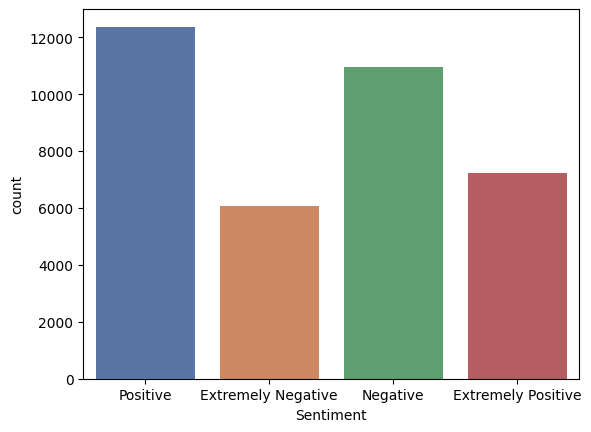

In [12]:
print(corona1['Sentiment'].value_counts())
sns.countplot(x="Sentiment", data=corona1, palette='deep')

In [11]:
corona1['tweet_copy2'] = corona1['OriginalTweet'] * 2 # create duplicate field
corona1['tweet_copy1'] = corona1['OriginalTweet'] * 2
corona1['tweet_copy3'] = corona1['OriginalTweet'] * 2

C:\Users\manna\AppData\Local\Temp\ipykernel_824\1905024881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy2'] = corona1['OriginalTweet'] * 2 # create duplicate field
C:\Users\manna\AppData\Local\Temp\ipykernel_824\1905024881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy1'] = corona1['OriginalTweet'] * 2
C:\Users\manna\AppData\Local\Temp\ipykernel_824\1905024881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [12]:
corona1

,UserName,ScreenName,OriginalTweet,Sentiment,tweet_copy2,tweet_copy1,tweet_copy3
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV..."
5,3804,48756,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,As news of the regionÂs first confirmed COVID...,As news of the regionÂs first confirmed COVID...
...,...,...,...,...,...,...,...
3792,3793,48745,"@RicePolitics @MDCounties Craig, will you call...",Negative,"@RicePolitics @MDCounties Craig, will you call...","@RicePolitics @MDCounties Craig, will you call...","@RicePolitics @MDCounties Craig, will you call..."
3793,3794,48746,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel -- People...
3794,3795,48747,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of non-perishable item...
3796,3797,48749,Gov need to do somethings instead of biar je r...,Extremely Negative,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...


In [13]:
corona1['Sentiment'].value_counts()

Sentiment
Positive              12369
Negative              10958
Extremely Positive     7223
Extremely Negative     6073
Name: count, dtype: int64

In [14]:
labels = np.where(corona1['Sentiment'].isin(['Positive', 'Extremely Positive']), 1, 0) # Labeling the sentiment to numeric value
corona1['Label'] = labels
corona1

C:\Users\manna\AppData\Local\Temp\ipykernel_824\334999186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['Label'] = labels


,UserName,ScreenName,OriginalTweet,Sentiment,tweet_copy2,tweet_copy1,tweet_copy3,Label
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...,1
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...,1
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV...",0
5,3804,48756,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,As news of the regionÂs first confirmed COVID...,As news of the regionÂs first confirmed COVID...,1
...,...,...,...,...,...,...,...,...
3792,3793,48745,"@RicePolitics @MDCounties Craig, will you call...",Negative,"@RicePolitics @MDCounties Craig, will you call...","@RicePolitics @MDCounties Craig, will you call...","@RicePolitics @MDCounties Craig, will you call...",0
3793,3794,48746,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel -- People...,1
3794,3795,48747,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of non-perishable item...,0
3796,3797,48749,Gov need to do somethings instead of biar je r...,Extremely Negative,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,0


In [15]:
corona1['Label'].value_counts()

Label
1    19592
0    17031
Name: count, dtype: int64

In [16]:
# from nltk.tokenize import TweetTokenizer
# tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
#                                reduce_len=True)
# corona1['tweet_copy2'] = corona1['tweet_copy1'].apply(lambda x: tokenizer.tokenize(x))
# corona1.drop('tokenized_tweet',axis=1,inplace=True)


In [17]:
corona1

,UserName,ScreenName,OriginalTweet,Sentiment,tweet_copy2,tweet_copy1,tweet_copy3,Label
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...,advice Talk to your neighbours family to excha...,1
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...,My food stock is not the only one which is emp...,1
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV...","Me, ready to go at supermarket during the #COV...",0
5,3804,48756,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,As news of the regionÂs first confirmed COVID...,As news of the regionÂs first confirmed COVID...,1
...,...,...,...,...,...,...,...,...
3792,3793,48745,"@RicePolitics @MDCounties Craig, will you call...",Negative,"@RicePolitics @MDCounties Craig, will you call...","@RicePolitics @MDCounties Craig, will you call...","@RicePolitics @MDCounties Craig, will you call...",0
3793,3794,48746,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel -- People...,Meanwhile In A Supermarket in Israel -- People...,1
3794,3795,48747,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of non-perishable item...,Did you panic buy a lot of non-perishable item...,0
3796,3797,48749,Gov need to do somethings instead of biar je r...,Extremely Negative,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,Gov need to do somethings instead of biar je r...,0


In [18]:
import string
punct=string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
## Create formula for remove punctuation
def remove_punctuation(text):
    text  = "".join([char for char in text if char not in punct])
    return text

In [ ]:
## formula applied for remove punctuation
corona1['tweet_copy1']=corona1['tweet_copy1'].apply(lambda x:remove_punctuation(x))
corona1['tweet_copy2']=corona1['tweet_copy2'].apply(lambda x:remove_punctuation(x))
corona1['tweet_copy3']=corona1['tweet_copy3'].apply(lambda x:remove_punctuation(x))

C:\Users\manna\AppData\Local\Temp\ipykernel_824\273872029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy1']=corona1['tweet_copy1'].apply(lambda x:remove_punctuation(x))
C:\Users\manna\AppData\Local\Temp\ipykernel_824\273872029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy2']=corona1['tweet_copy2'].apply(lambda x:remove_punctuation(x))
C:\Users\manna\AppData\Local\Temp\ipykernel_824\273872029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

In [ ]:
## convert to lower case
corona1['tweet_copy1']=corona1['tweet_copy1'].apply(lambda x:x.lower())
corona1['tweet_copy2']=corona1['tweet_copy2'].apply(lambda x:x.lower())
corona1['tweet_copy3']=corona1['tweet_copy3'].apply(lambda x:x.lower())

C:\Users\manna\AppData\Local\Temp\ipykernel_824\3208934453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy1']=corona1['tweet_copy1'].apply(lambda x:x.lower())
C:\Users\manna\AppData\Local\Temp\ipykernel_824\3208934453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy2']=corona1['tweet_copy2'].apply(lambda x:x.lower())
C:\Users\manna\AppData\Local\Temp\ipykernel_824\3208934453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
## remove stopwords
import nltk

from nltk.corpus import stopwords
stpwrds = stopwords.words('english')

corona1['tweet_copy1'] = corona1['tweet_copy1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stpwrds)]))
corona1['tweet_copy2'] = corona1['tweet_copy2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stpwrds)]))
corona1['tweet_copy3'] = corona1['tweet_copy3'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stpwrds)]))
print(corona1)

C:\Users\manna\AppData\Local\Temp\ipykernel_824\3513714957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy1'] = corona1['tweet_copy1'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stpwrds)]))
C:\Users\manna\AppData\Local\Temp\ipykernel_824\3513714957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy2'] = corona1['tweet_copy2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stpwrds)]))


      UserName  ScreenName                                      OriginalTweet  \
1         3800       48752  advice Talk to your neighbours family to excha...   
2         3801       48753  Coronavirus Australia: Woolworths to give elde...   
3         3802       48754  My food stock is not the only one which is emp...   
4         3803       48755  Me, ready to go at supermarket during the #COV...   
5         3804       48756  As news of the regionÂs first confirmed COVID...   
...        ...         ...                                                ...   
3792      3793       48745  @RicePolitics @MDCounties Craig, will you call...   
3793      3794       48746  Meanwhile In A Supermarket in Israel -- People...   
3794      3795       48747  Did you panic buy a lot of non-perishable item...   
3796      3797       48749  Gov need to do somethings instead of biar je r...   
3797      3798       48750  I and @ForestandPaper members are committed to...   

               Sentiment   

C:\Users\manna\AppData\Local\Temp\ipykernel_824\3513714957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy3'] = corona1['tweet_copy3'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stpwrds)]))


In [23]:
def build_freqs(tweet, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweet):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs


In [24]:
freqs = build_freqs(corona1['tweet_copy1'], labels)
print(freqs)
print(f'type(freqs) = {type(freqs)}')

{('a', 1): 375605, ('d', 1): 194887, ('v', 1): 101886, ('i', 1): 378152, ('c', 1): 256698, ('e', 1): 570603, (' ', 1): 762859, ('t', 1): 384564, ('l', 1): 223716, ('k', 1): 84016, ('n', 1): 333994, ('g', 1): 137061, ('h', 1): 149086, ('b', 1): 62824, ('o', 1): 410391, ('u', 1): 161372, ('r', 1): 369620, ('s', 1): 412268, ('f', 1): 77718, ('m', 1): 141682, ('y', 1): 97355, ('x', 1): 16132, ('p', 1): 201077, ('q', 1): 12474, ('w', 1): 66217, ('1', 1): 34052, ('9', 1): 29332, ('8', 1): 5634, ('z', 1): 17736, ('0', 1): 16318, ('5', 1): 7084, ('2', 1): 12788, ('j', 1): 13804, ('r', 0): 312427, ('e', 0): 463086, ('a', 0): 311166, ('d', 0): 173788, ('y', 0): 82336, (' ', 0): 653407, ('g', 0): 121870, ('o', 0): 353761, ('s', 0): 352999, ('u', 0): 145318, ('p', 0): 172131, ('m', 0): 120448, ('k', 0): 68610, ('t', 0): 310683, ('c', 0): 226995, ('v', 0): 84781, ('i', 0): 332087, ('1', 0): 28986, ('9', 0): 25066, ('b', 0): 56980, ('n', 0): 283689, ('f', 0): 65321, ('l', 0): 190082, ('h', 0): 11412

In [25]:
corona1['tweet_copy1']

1       advice talk neighbours family exchange phone n...
2       coronavirus australia woolworths give elderly ...
3       food stock one empty please dont panic enough ...
4       ready go supermarket covid19 outbreak im paran...
5       news regionâs first confirmed covid19 case ca...
                              ...                        
3792    ricepolitics mdcounties craig call general ass...
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot nonperishable items echo needs f...
3796    gov need somethings instead biar je rakyat ass...
3797    forestandpaper members committed safety employ...
Name: tweet_copy1, Length: 36623, dtype: object

In [26]:
from nltk.stem import PorterStemmer # Stemming

ps = PorterStemmer()

In [27]:
def stemmer(text):## defining a function to apply stemming
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

corona1['tweet_copy1'] = corona1['tweet_copy1'].apply(lambda x: stemmer(x))
corona1.head()

C:\Users\manna\AppData\Local\Temp\ipykernel_824\1160937321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['tweet_copy1'] = corona1['tweet_copy1'].apply(lambda x: stemmer(x))


,UserName,ScreenName,OriginalTweet,Sentiment,tweet_copy2,tweet_copy1,tweet_copy3,Label
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...,advice talk neighbours family exchange phone n...,1
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...,coronavirus australia woolworths give elderly ...,1
3,3802,48754,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,1
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...,ready go supermarket covid19 outbreak im paran...,0
5,3804,48756,As news of the regionÂs first confirmed COVID...,Positive,news regionâs first confirmed covid19 case ca...,news regionâ first confirm covid19 case came ...,news regionâs first confirmed covid19 case ca...,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = corona1["tweet_copy1"]
y = corona1["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
X

1       advic talk neighbour famili exchang phone numb...
2       coronaviru australia woolworth give elderli di...
3       food stock one empti pleas dont panic enough f...
4       readi go supermarket covid19 outbreak im paran...
5       news regionâ first confirm covid19 case came ...
                              ...                        
3792    ricepolit mdcounti craig call gener assembl en...
3793    meanwhil supermarket israel peopl danc sing to...
3794    panic buy lot nonperish item echo need food do...
3796    gov need someth instead biar je rakyat assum l...
3797    forestandpap member commit safeti employe endu...
Name: tweet_copy1, Length: 36623, dtype: object

In [30]:
y

1       1
2       1
3       1
4       0
5       1
       ..
3792    0
3793    1
3794    0
3796    0
3797    1
Name: Label, Length: 36623, dtype: int32

In [31]:
X_test.shape

(7325,)

In [32]:
corona1.head()

,UserName,ScreenName,OriginalTweet,Sentiment,tweet_copy2,tweet_copy1,tweet_copy3,Label
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...,advice talk neighbours family exchange phone n...,1
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...,coronavirus australia woolworths give elderly ...,1
3,3802,48754,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,1
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...,ready go supermarket covid19 outbreak im paran...,0
5,3804,48756,As news of the regionÂs first confirmed COVID...,Positive,news regionâs first confirmed covid19 case ca...,news regionâ first confirm covid19 case came ...,news regionâs first confirmed covid19 case ca...,1


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [35]:
print(X_train)
print(X_test)

389      13 encourag client consum think past current s...
2250     panic citi amid partial lockdown govt shut the...
3099     scammer take advantag fear surround coronaviru...
34380    healthcar worker law enforc offici semitruck d...
196      gtmassgovernor announc 10m loan fund administ ...
                               ...                        
9499     onetwo punch new coronaviru fall oil price thr...
39987    surg renew gener work low demand follow closur...
6311     httpstcojpplvjmluj execut condo sale launch se...
14764    frozen stock bag get pretti full might time ma...
40590    proud member staff covid 19 culinari staff ope...
Name: tweet_copy1, Length: 29298, dtype: object
3960     crude price fall 17year low coronaviru spread ...
952      ar covid19 latest asahutchinson food suppli fo...
21248    public author consum protect pacp issu resolut...
39840    us consum price fell five year march decreas l...
107      amid social distanc covid19 crisi starbuck mov...
        

In [36]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [37]:
models = [
    MultinomialNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: {accuracy*100:.2f}")
    print("-"*30)

MultinomialNB: 77.84
------------------------------
LogisticRegression: 85.30
------------------------------
DecisionTreeClassifier: 74.38
------------------------------
RandomForestClassifier: 81.73
------------------------------


In [38]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X_train_tfidf, y_train)

y_pred = gnb.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.7784300341296928

In [39]:
# Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

y_pred = lr.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.8529692832764505

In [40]:
# Applying Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.8136518771331058

In [41]:
# Applying N-grams
cv = CountVectorizer(ngram_range=(1, 2), max_features=10000)
X_train_tfidf = cv.fit_transform(X_train).toarray()
X_test_tfidf = cv.transform(X_test).toarray()

rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.8233447098976109

In [42]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred)

0.8124232081911262

In [43]:
# Applying Naive Bayes(GaussianNB)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)

y_pred = gnb.predict(X_test_tfidf.toarray())
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5873037542662116


## Model Cheking applyig MultinomialNB

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Example training data (X_train and y_train need to be defined)
# X_train = ['sample text 1', 'sample text 2', ...]
# y_train = [0, 1, ...]

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize and train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


new_data = ['Is this effective? Is it necessary? Or is it just optics? Scare tactics? For the American consumer? For US MSM to use? If optics, What is the intended effect? Fear? Crash US Market-&gt;panic-&gt;elect Biden']

new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_probabilities = model.predict_proba(new_data_tfidf)

positive_probabilities = predicted_probabilities[:, 1]  # Assuming positive class is encoded as 1

positive_threshold = 0.8
negative_threshold = 0.2

# Classify the new data based on the probability thresholds
predictions = []
for prob in positive_probabilities:
    if prob >= positive_threshold:
        predictions.append('Extremely positive')
    elif prob >= 0.5:
        predictions.append('positive')
    elif prob <= negative_threshold:
        predictions.append('Extremely negative')
    else:
        predictions.append('negative')

predicted_labels = model.predict(new_data_tfidf)

# Print the predicted class label and the probability score for each data point
for label, probability, prediction in zip(predicted_labels, positive_probabilities, predictions):
    print("Probability Score for Positive Class:", probability)
    print("Predicted Class:", prediction)


Probability Score for Positive Class: 0.3578714158956346
Predicted Class: negative


In [45]:
## Apply LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Example training data (X_train and y_train need to be defined)
# X_train = ['sample text 1', 'sample text 2', ...]
# y_train = [0, 1, ...]

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


new_data = ['IMHO Russias rug pull on oil prices is designed to end the dollar as the global reserve currency. How? Corp debt collapse, led by high yield and fracking, compounded by COVID-19, will mean Fed and US Govt respond with #MMT. Ciao dollar. Alt is collapse. Got #Gold or #Silver yet?']

new_data_tfidf = tfidf_vectorizer.transform(new_data)
predicted_probabilities = model.predict_proba(new_data_tfidf)

positive_probabilities = predicted_probabilities[:, 1]  # Assuming positive class is encoded as 1

positive_threshold = 0.8
negative_threshold = 0.2

# Classify the new data based on the probability thresholds
predictions = []
for prob in positive_probabilities:
    if prob >= positive_threshold:
        predictions.append('Extremely positive')
    elif prob >= 0.5:
        predictions.append('positive')
    elif prob <= negative_threshold:
        predictions.append('Extremely negative')
    else:
        predictions.append('negative')

predicted_labels = model.predict(new_data_tfidf)

# Print the predicted class label and the probability score for each data point
for label, probability, prediction in zip(predicted_labels, positive_probabilities, predictions):
    print("Probability Score for Positive Class:", probability)
    print("Predicted Class:", prediction)

Probability Score for Positive Class: 0.3078905930383381
Predicted Class: negative


### After Snwoball Stemming


In [46]:
from nltk.stem import SnowballStemmer
import pandas as pd
stemmer = SnowballStemmer('english')

for tweet in corona1['tweet_copy2']:
    stemmed_tweet = ' '.join([stemmer.stem(word) for word in tweet.split()])
corona1.head(100)

,UserName,ScreenName,OriginalTweet,Sentiment,tweet_copy2,tweet_copy1,tweet_copy3,Label
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...,advice talk neighbours family exchange phone n...,1
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,coronaviru australia woolworth give elderli di...,coronavirus australia woolworths give elderly ...,1
3,3802,48754,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,food stock one empti pleas dont panic enough f...,food stock one empty please dont panic enough ...,1
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...,readi go supermarket covid19 outbreak im paran...,ready go supermarket covid19 outbreak im paran...,0
5,3804,48756,As news of the regionÂs first confirmed COVID...,Positive,news regionâs first confirmed covid19 case ca...,news regionâ first confirm covid19 case came ...,news regionâs first confirmed covid19 case ca...,1
...,...,...,...,...,...,...,...,...
115,3914,48866,@SPARintheUK Can you confirm why in store sign...,Positive,sparintheuk confirm store signage says youre t...,sparintheuk confirm store signag say your take...,sparintheuk confirm store signage says youre t...,1
116,3915,48867,More idiots at work causing unnecessary proble...,Negative,idiots work causing unnecessary problems empty...,idiot work caus unnecessari problem empti shel...,idiots work causing unnecessary problems empty...,0
117,3916,48868,It's fringing idiots like him who have caused ...,Positive,fringing idiots like caused prices rise amp cr...,fring idiot like caus price rise amp creat sho...,fringing idiots like caused prices rise amp cr...,1
118,3917,48869,CONGRESS (TEMPORARILY?) PARALYZED \r\r\n\r\r\n...,Negative,congress temporarily paralyzed â house still ...,congress temporarili paralyz â hous still fin...,congress temporarily paralyzed â house still ...,0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = corona1["tweet_copy2"]
y = corona1["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
X

1       advice talk neighbours family exchange phone n...
2       coronavirus australia woolworths give elderly ...
3       food stock one empty please dont panic enough ...
4       ready go supermarket covid19 outbreak im paran...
5       news regionâs first confirmed covid19 case ca...
                              ...                        
3792    ricepolitics mdcounties craig call general ass...
3793    meanwhile supermarket israel people dance sing...
3794    panic buy lot nonperishable items echo needs f...
3796    gov need somethings instead biar je rakyat ass...
3797    forestandpaper members committed safety employ...
Name: tweet_copy2, Length: 36623, dtype: object

In [49]:
y

1       1
2       1
3       1
4       0
5       1
       ..
3792    0
3793    1
3794    0
3796    0
3797    1
Name: Label, Length: 36623, dtype: int32

In [50]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [51]:
models = [
    MultinomialNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: {accuracy*100:.2f}")
    print("-"*30)

MultinomialNB: 77.95
------------------------------
LogisticRegression: 85.04
------------------------------
DecisionTreeClassifier: 74.28
------------------------------
RandomForestClassifier: 80.67
------------------------------


### Use of Lemitization

In [52]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
lemmatizer = WordNetLemmatizer()

corona1['tweet_copy3'].fillna('', inplace=True)

corona1['lemmatized_tweet'] = corona1['tweet_copy3'].apply(lambda tweet: ' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]))
print(corona1.head(100))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\manna\AppData\Local\Temp\ipykernel_824\2115217435.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  corona1['tweet_copy3'].fillna('', inplace=True)
C:\Users\manna\AppData\Local\Temp\ipykernel_824\2115217435.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

     UserName  ScreenName                                      OriginalTweet  \
1        3800       48752  advice Talk to your neighbours family to excha...   
2        3801       48753  Coronavirus Australia: Woolworths to give elde...   
3        3802       48754  My food stock is not the only one which is emp...   
4        3803       48755  Me, ready to go at supermarket during the #COV...   
5        3804       48756  As news of the regionÂs first confirmed COVID...   
..        ...         ...                                                ...   
115      3914       48866  @SPARintheUK Can you confirm why in store sign...   
116      3915       48867  More idiots at work causing unnecessary proble...   
117      3916       48868  It's fringing idiots like him who have caused ...   
118      3917       48869  CONGRESS (TEMPORARILY?) PARALYZED \r\r\n\r\r\n...   
119      3918       48870  The Consumer Financial Protection Bureau has r...   

              Sentiment                

C:\Users\manna\AppData\Local\Temp\ipykernel_824\2115217435.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corona1['lemmatized_tweet'] = corona1['tweet_copy3'].apply(lambda tweet: ' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]))


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = corona1["tweet_copy3"]
y = corona1["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [54]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

nan_indices_train = np.isnan(y_train)
nan_indices_test = np.isnan(y_test)

X_train_clean = X_train[~nan_indices_train]
X_test_clean = X_test[~nan_indices_test]
y_train_clean = y_train[~nan_indices_train]
y_test_clean = y_test[~nan_indices_test]



In [55]:
models = [
    MultinomialNB(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

for model in models:
    try:
          model.fit(X_train_tfidf, y_train_clean)
          y_pred = model.predict(X_test_tfidf)
          accuracy = accuracy_score(y_test_clean, y_pred)
          print(f"{model.__class__.__name__}: {accuracy*100:.2f}")
          print("-" * 30)
    except ValueError as e:
          print(f"Error occurred for {model.__class__.__name__}: {e}")

MultinomialNB: 77.95
------------------------------
LogisticRegression: 85.04
------------------------------
DecisionTreeClassifier: 74.21
------------------------------
RandomForestClassifier: 80.97
------------------------------
